<a href="https://colab.research.google.com/github/nocturnal-deviant/nocturnal-deviant/blob/main/lung_cancer_decision_tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
df=pd.read_csv("/content/lung_cancer_.csv")
df.head()

,Name,Surname,Age,Smokes,AreaQ,Alkhol,Result
0,John,Wick,35,3,5,4,1
1,John,Constantine,27,20,2,5,1
2,Camela,Anderson,30,0,5,2,0
3,Alex,Telles,28,0,8,1,0
4,Diego,Maradona,68,4,5,6,1


In [3]:
df.describe(include='all')

,Name,Surname,Age,Smokes,AreaQ,Alkhol,Result
count,59,59,59.000000,59.000000,59.000000,59.000000,59.000000
unique,49,49,NaN,NaN,NaN,NaN,NaN
top,Katharine,Hepburn,NaN,NaN,NaN,NaN,NaN
freq,4,4,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,42.627119,15.067797,5.203390,3.237288,0.474576
std,NaN,NaN,16.235230,7.984607,2.461984,2.380517,0.503640
min,NaN,NaN,18.000000,0.000000,1.000000,0.000000,0.000000
25%,NaN,NaN,29.000000,10.000000,3.000000,1.000000,0.000000
50%,NaN,NaN,39.000000,15.000000,5.000000,3.000000,0.000000
75%,NaN,NaN,55.000000,20.000000,7.500000,5.000000,1.000000


In [4]:
df.shape

(59, 7)

In [9]:
df=df.drop(['Name','Surname'],axis=1)

In [10]:
df.head()

,Age,Smokes,AreaQ,Alkhol,Result
0,35,3,5,4,1
1,27,20,2,5,1
2,30,0,5,2,0
3,28,0,8,1,0
4,68,4,5,6,1


In [13]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [15]:
from sklearn.feature_selection import SelectKBest
skb=SelectKBest(k='all')
fit=skb.fit(x,y)
dfscores=pd.DataFrame(fit.scores_)
dfcol=pd.DataFrame(x.columns)
fs=pd.concat([dfcol,dfscores],axis=1)
fs.columns=['Spec','Score']
print(fs)


     Spec       Score
0     Age   39.071846
1  Smokes    9.237498
2   AreaQ   71.796791
3  Alkhol  109.089645


In [16]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.30,random_state=1)

In [17]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(xtrain)
xtrain=scaler.fit_transform(xtrain)
xtest=scaler.fit_transform(xtest)
print(xtrain)

[[ 2.09039124  0.63995837 -0.07059551  0.31279639]
 [-0.45226265 -0.35284191 -0.07059551 -0.51460051]
 [ 0.22991278 -0.49467052  1.16986852 -1.34199741]
 [ 0.60200847  0.63995837  0.3428925  -0.10090206]
 [-0.57629454 -0.49467052  1.16986852 -1.34199741]
 [-0.76234239  0.63995837  1.58335653  0.31279639]
 [-0.01815101  2.05824449 -0.89757154  1.96759018]
 [ 0.78805632  0.63995837 -0.89757154 -0.10090206]
 [-0.94839023  0.63995837 -1.31105955  1.96759018]
 [-1.32048593  0.63995837  0.3428925  -0.51460051]
 [-0.08016696 -0.49467052  0.3428925  -0.51460051]
 [ 0.22991278 -0.06918469 -1.72454756  1.96759018]
 [-1.50653377 -0.49467052  1.16986852 -1.34199741]
 [-1.07242213 -0.35284191  0.3428925  -0.92829896]
 [ 1.16015201  1.34910143 -0.89757154  0.31279639]
 [ 0.04386494 -1.48747081  1.16986852 -0.92829896]
 [ 1.5322477  -1.62929942 -0.07059551  1.14019328]
 [-0.57629454  1.34910143 -0.48408353  1.96759018]
 [-0.20419885  0.63995837 -1.31105955  1.55389173]
 [ 0.72604037  0.63995837 -1.72

In [19]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier(max_depth=4,criterion='entropy')
dt.fit(xtrain,ytrain)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [21]:
ypred=dt.predict(xtest)
print(ypred)

[1 0 0 0 1 0 0 1 0 1 0 0 1 1 1 0 1 0]


In [22]:
print(dt.predict([[35,3,5,4]]))

[1]


In [24]:
from sklearn.metrics import accuracy_score
r1=accuracy_score(ytest,ypred)
print(r1)

0.9444444444444444


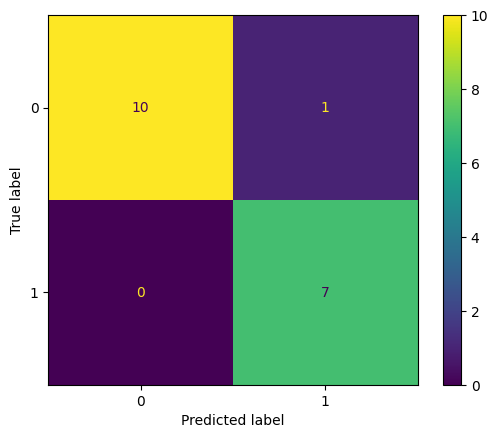

In [25]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(ytest,ypred)

[Text(0.4, 0.875, 'Alkhol <= -0.308\nentropy = 1.0\nsamples = 41\nvalue = [20, 21]\nclass = 1'),
 Text(0.2, 0.625, 'entropy = 0.0\nsamples = 16\nvalue = [16, 0]\nclass = 0'),
 Text(0.6, 0.625, 'Age <= -0.669\nentropy = 0.634\nsamples = 25\nvalue = [4, 21]\nclass = 1'),
 Text(0.4, 0.375, 'AreaQ <= -0.691\nentropy = 0.918\nsamples = 6\nvalue = [4, 2]\nclass = 0'),
 Text(0.2, 0.125, 'entropy = 0.0\nsamples = 2\nvalue = [0, 2]\nclass = 1'),
 Text(0.6, 0.125, 'entropy = 0.0\nsamples = 4\nvalue = [4, 0]\nclass = 0'),
 Text(0.8, 0.375, 'entropy = 0.0\nsamples = 19\nvalue = [0, 19]\nclass = 1')]

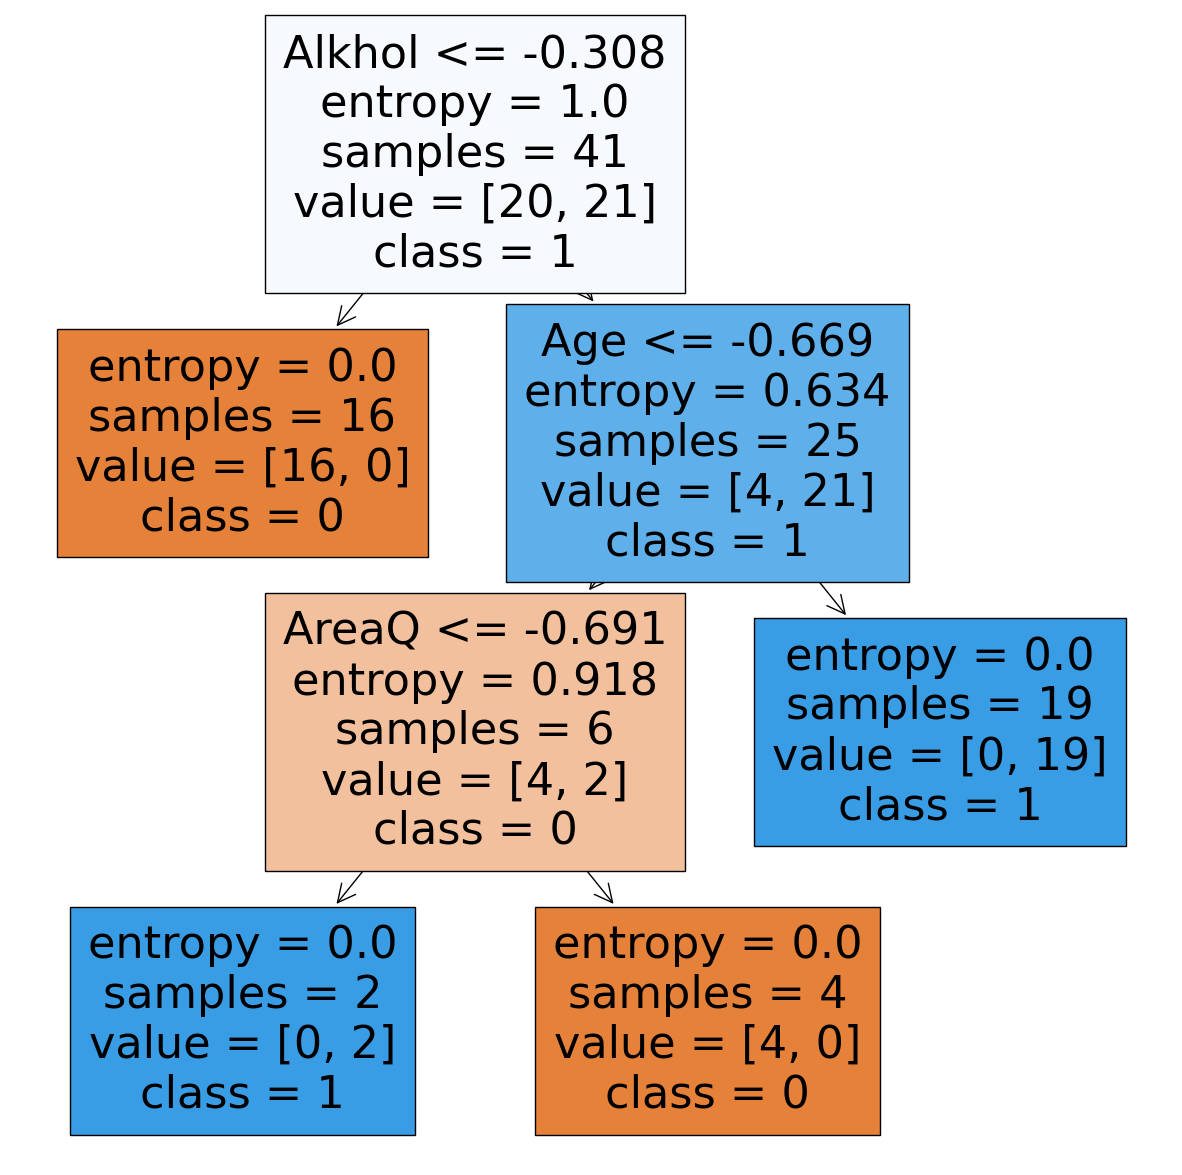

In [26]:
from sklearn import tree
import matplotlib.pyplot as plt
plt.figure(figsize=(15,15))
tree.plot_tree(dt,feature_names=['Age','Smokes','AreaQ','Alkhol'],class_names=['0','1'],filled=True)